# feature selection 


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [26]:
data = pd.read_csv("Algerian_forest_fires_cleaned_1_dataset.csv")

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  240 non-null    int64  
 1   RH           240 non-null    int64  
 2   Ws           240 non-null    int64  
 3   Rain         240 non-null    float64
 4   FFMC         240 non-null    float64
 5   DMC          240 non-null    float64
 6   DC           240 non-null    float64
 7   ISI          240 non-null    float64
 8   BUI          240 non-null    float64
 9   FWI          240 non-null    float64
 10  Classes      240 non-null    int64  
 11  region       240 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.6 KB


In [28]:
x = data.drop("FWI",axis = 1)
y = data["FWI"]


<Axes: >

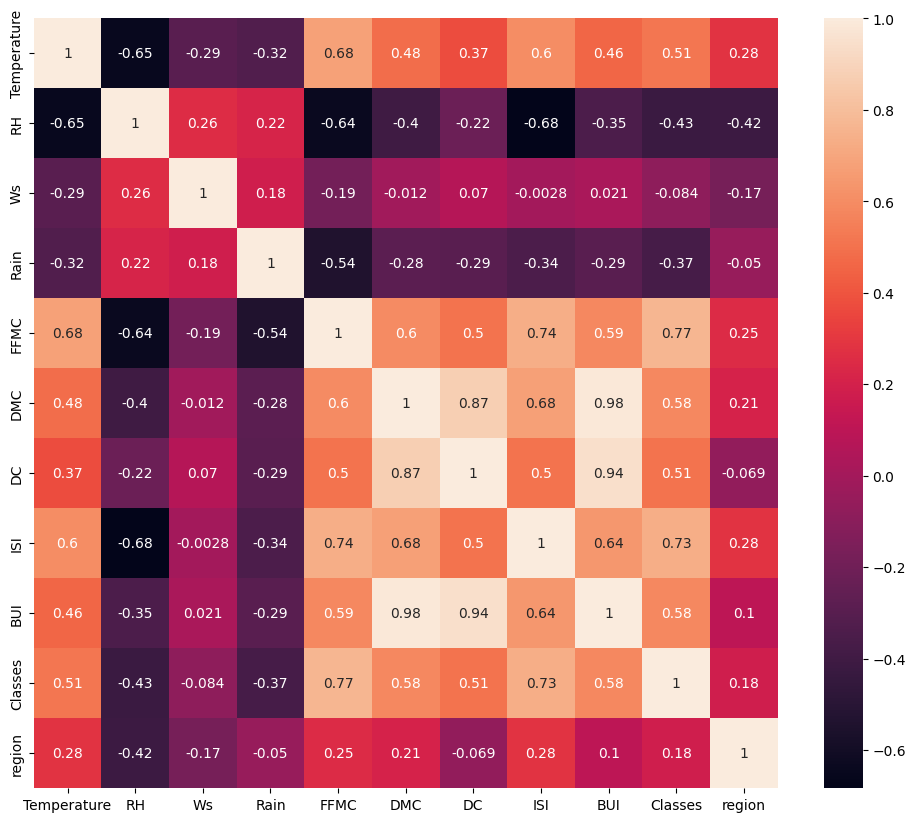

In [29]:
# check for multicolilinearity
plt.figure(figsize=(12,10))
corr = x.corr()
sns.heatmap(corr,annot = True)

In [31]:
corr


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.649802,-0.291140,-0.323022,0.678971,0.483523,0.373420,0.602681,0.457422,0.514226,0.278260
RH,-0.649802,1.000000,0.255299,0.216739,-0.640929,-0.402397,-0.219748,-0.683522,-0.347170,-0.425591,-0.418104
Ws,-0.291140,0.255299,1.000000,0.180838,-0.188755,-0.011795,0.070162,-0.002766,0.020802,-0.083729,-0.172026
Rain,-0.323022,0.216739,0.180838,1.000000,-0.541563,-0.283254,-0.293190,-0.342487,-0.294472,-0.373995,-0.049869
FFMC,0.678971,-0.640929,-0.188755,-0.541563,1.000000,0.597287,0.500500,0.736569,0.585522,0.765653,0.249356
DMC,0.483523,-0.402397,-0.011795,-0.283254,0.597287,1.000000,0.874645,0.676371,0.982032,0.579844,0.207052
DC,0.373420,-0.219748,0.070162,-0.293190,0.500500,0.874645,1.000000,0.503163,0.941429,0.505201,-0.068525
ISI,0.602681,-0.683522,-0.002766,-0.342487,0.736569,0.676371,0.503163,1.000000,0.639580,0.731356,0.279636
BUI,0.457422,-0.347170,0.020802,-0.294472,0.585522,0.982032,0.941429,0.639580,1.000000,0.580889,0.102985
Classes,0.514226,-0.425591,-0.083729,-0.373995,0.765653,0.579844,0.505201,0.731356,0.580889,1.000000,0.179193


In [32]:
def correlation(data, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # Find the correlation greater than the threshold
                colname = corr_matrix.columns[i]  # Get the name of the column
                col_corr.add(colname)
    
    return col_corr


In [33]:
# threshold domain experties 
corr_feature = correlation(x,0.85)
corr_feature

{'BUI', 'DC'}

In [35]:
# removing the feature when corelation is more then 0.85 
x.drop(corr_feature,axis = 1,inplace = True)

In [36]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  240 non-null    int64  
 1   RH           240 non-null    int64  
 2   Ws           240 non-null    int64  
 3   Rain         240 non-null    float64
 4   FFMC         240 non-null    float64
 5   DMC          240 non-null    float64
 6   ISI          240 non-null    float64
 7   Classes      240 non-null    int64  
 8   region       240 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 17.0 KB


## standardization

In [37]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scaled = ss.fit_transform(x)


In [38]:
x_scaleddf = pd.DataFrame(x_scaled,columns = ["Temperature","RH","Ws","Rain","FFMC","DMC","ISI","Classes","region"])

In [39]:
x_scaleddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  240 non-null    float64
 1   RH           240 non-null    float64
 2   Ws           240 non-null    float64
 3   Rain         240 non-null    float64
 4   FFMC         240 non-null    float64
 5   DMC          240 non-null    float64
 6   ISI          240 non-null    float64
 7   Classes      240 non-null    float64
 8   region       240 non-null    float64
dtypes: float64(9)
memory usage: 17.0 KB


In [40]:
x_train,x_test,y_train,y_test = train_test_split(x_scaleddf,y,test_size = 0.2,random_state=3) 


In [41]:
print(x_train)
print(x_test)
print(y_test)
print(y_train)

     Temperature        RH        Ws      Rain      FFMC       DMC       ISI  \
58     -0.048147  0.750333 -0.186991 -0.372483  0.597791  0.959430  0.194152   
4      -1.423777  1.020318  0.169183 -0.372483 -0.943071 -0.956735 -0.867602   
77      1.327482 -0.667088  0.881531 -0.372483  0.788631  0.094326  1.183514   
186     1.327482 -0.397103 -1.611688 -0.372483  0.654336 -0.293758  0.097629   
70      0.777231 -0.464599 -0.543165 -0.372483  0.760359  0.304538  0.628506   
..           ...       ...       ...       ...       ...       ...       ...   
200     1.327482 -0.599592 -0.543165 -0.372483  0.802768  2.123682  0.773291   
184    -0.598399 -0.532096 -0.543165  1.178314 -0.540185 -0.309928 -0.843471   
131    -0.598399 -0.667088 -0.186991  0.628031 -0.412958 -0.277588 -0.819341   
152     0.502105 -0.262110  0.881531 -0.372483  0.696745 -0.099716  0.773291   
106    -2.249154  1.357800 -0.186991 -0.172380 -2.349637 -1.126522 -1.108910   

      Classes    region  
58   0.867078

Text(0.5, 1.0, 'after scaling')

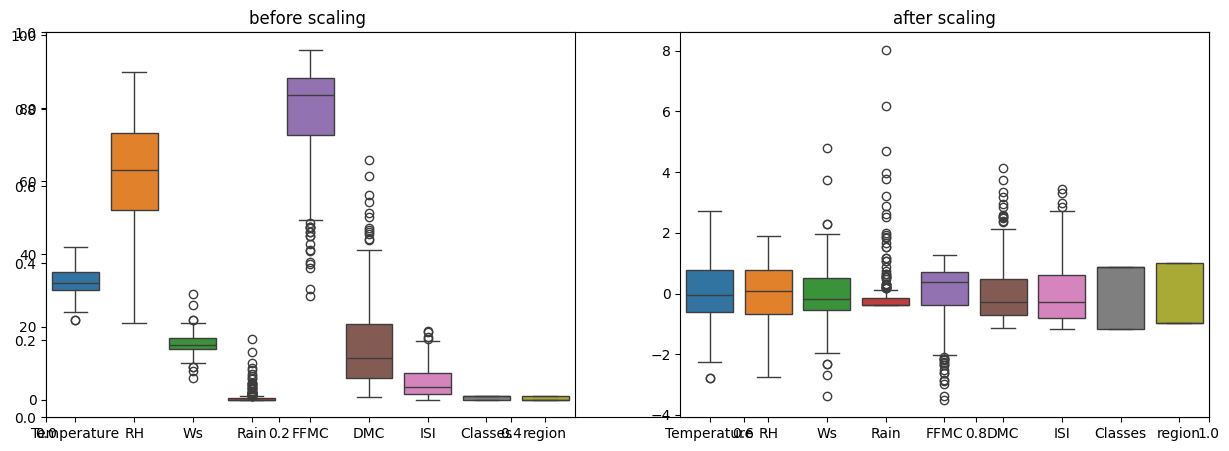

In [42]:
# box plot to understand the effect fo box plot 
plt.subplots(figsize= (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = x)
plt.title("before scaling ")
plt.subplot(1,2,2)
sns.boxplot(data = x_scaleddf)
plt.title("after scaling")

In [43]:
print(y_train)

58     11.9
4       0.5
77     14.6
186     5.9
70     11.6
       ... 
200    18.1
184     0.8
131     0.9
152     9.9
106     0.0
Name: FWI, Length: 192, dtype: float64


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score

# Example usage
lr = LinearRegression()
lr.fit(x_train,y_train)
x_test_predict = lr.predict(x_test)
mae = mean_absolute_error(y_test,x_test_predict)
score = r2_score(y_test,x_test_predict)
print("mean absolute error:",mae)
print("r2_score:",score)  

mean absolute error: 1.0004070476327704
r2_score: 0.9191030362726245


## lasso rregression

In [45]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
l = Lasso()
l.fit(x_train,y_train)
x_test_predict = l.predict(x_test)
mae = mean_absolute_error(y_test,x_test_predict)
score = r2_score(y_test,x_test_predict)
print("mean absolute error:",mae)
print("r2_score:",score)

mean absolute error: 1.4487496361550782
r2_score: 0.9160103541628342


## ridge regression model

In [47]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
r = Ridge()
r.fit(x_train,y_train)
x_test_predict = r.predict(x_test)
mae = mean_absolute_error(y_test,x_test_predict)
score = r2_score(y_test,x_test_predict)
print("mean absolute error:",mae)
print("r2_score:",score )

mean absolute error: 0.980698946381561
r2_score: 0.9218044034047315


## elasticnet Regression

In [48]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
en = ElasticNet()
en.fit(x_train,y_train)
x_test_predict = en.predict(x_test)
mae = mean_absolute_error(y_test,x_test_predict)
score = r2_score(y_test,x_test_predict)
print("mean absolute error:",mae)
print("r2_score:",score)

mean absolute error: 2.0902654363756947
r2_score: 0.8694174977436337


In [49]:
import pickle
pickle.dump(ss,open('scaler.pkl','wb')) 
pickle.dump(r,open('ridge.pkl','wb'))